# Water Quality Prediction



* **Project Title:** Water Quality Analysis Using Machine Learning
* **Department:** CSE A
* **Submitted By:**

  * Ginjala Meghana     (Roll No: 1608-22-733-013)
  * N Chaitanya Sarvani (Roll No: 1608-22-733-024)
  * Madhappavar Nikhil  (Roll No: 1608-22-733-042)
* **Academic Year:** 2024–2025


## **Objective**
This project aims to analyze water quality data and predict the potability of water based on various chemical parameters using machine learning techniques.

## **Dataset Overview**
The dataset contains 3,276 samples with the following features:

- **pH**  
- **Hardness**  
- **Solids (TDS)**  
- **Chloramines**  
- **Sulfate**  
- **Conductivity**  
- **Organic Carbon**  
- **Trihalomethanes**  
- **Turbidity**  

The target variable is `Potability`, which indicates whether the water is **safe (1)** or **unsafe (0)** for drinking.

## **Approach**

- **Data Preprocessing**: Handling missing values, normalization  
- **Exploratory Data Analysis (EDA)**: Visualizing distributions and correlations  
- **Feature Importance Analysis**: Using Decision Tree  
- **Model Implementation**:
  - Logistic Regression  
  - K-Nearest Neighbors (KNN)  
  - Decision Tree  
  - Random Forest  
  - Support Vector Machine (SVM)  
- **Hyperparameter Tuning**: Applied using GridSearchCV  
- **Model Evaluation**: Accuracy, confusion matrix, classification report

## **Key Findings**

- Most influential features: **Solids, Conductivity, Turbidity, Chloramines, Organic Carbon**  
- Best model accuracy achieved: **~61%**  
- Decision Tree and Random Forest performed the best after tuning  
- SVM struggled due to class imbalance and possibly lack of feature scaling

## **Conclusion**
Machine learning models can be applied to predict water potability with moderate accuracy. The project offers insights into which water quality parameters most influence potability. With more advanced preprocessing, feature engineering, and balancing methods, prediction accuracy could be further improved.


## Data Gathering

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Exploratory Data Analysis

In [5]:
df.shape

(3276, 10)

In [6]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [9]:
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [10]:
df.Potability.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

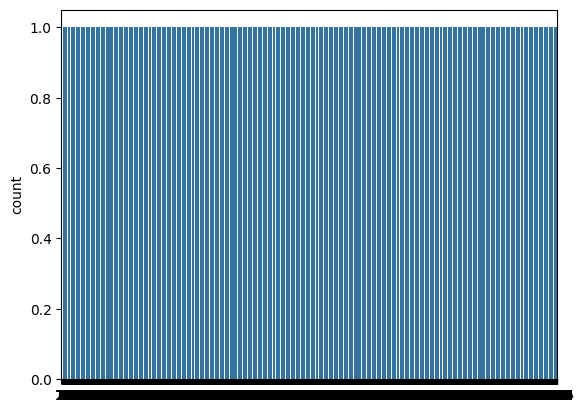

In [11]:
sns.countplot(df['Potability'])
plt.show()

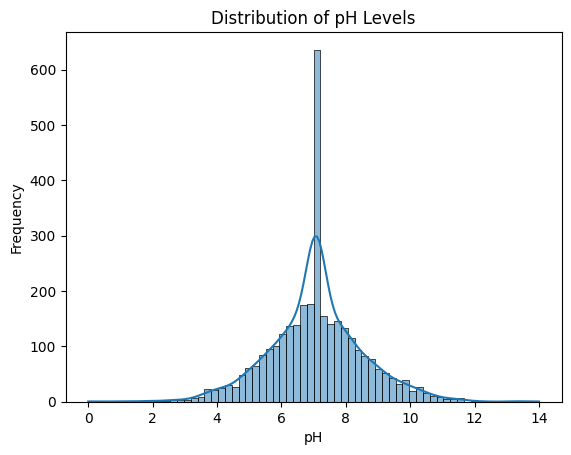

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['ph'], kde=True)
plt.title("Distribution of pH Levels")
plt.xlabel("pH")
plt.ylabel("Frequency")
plt.show()


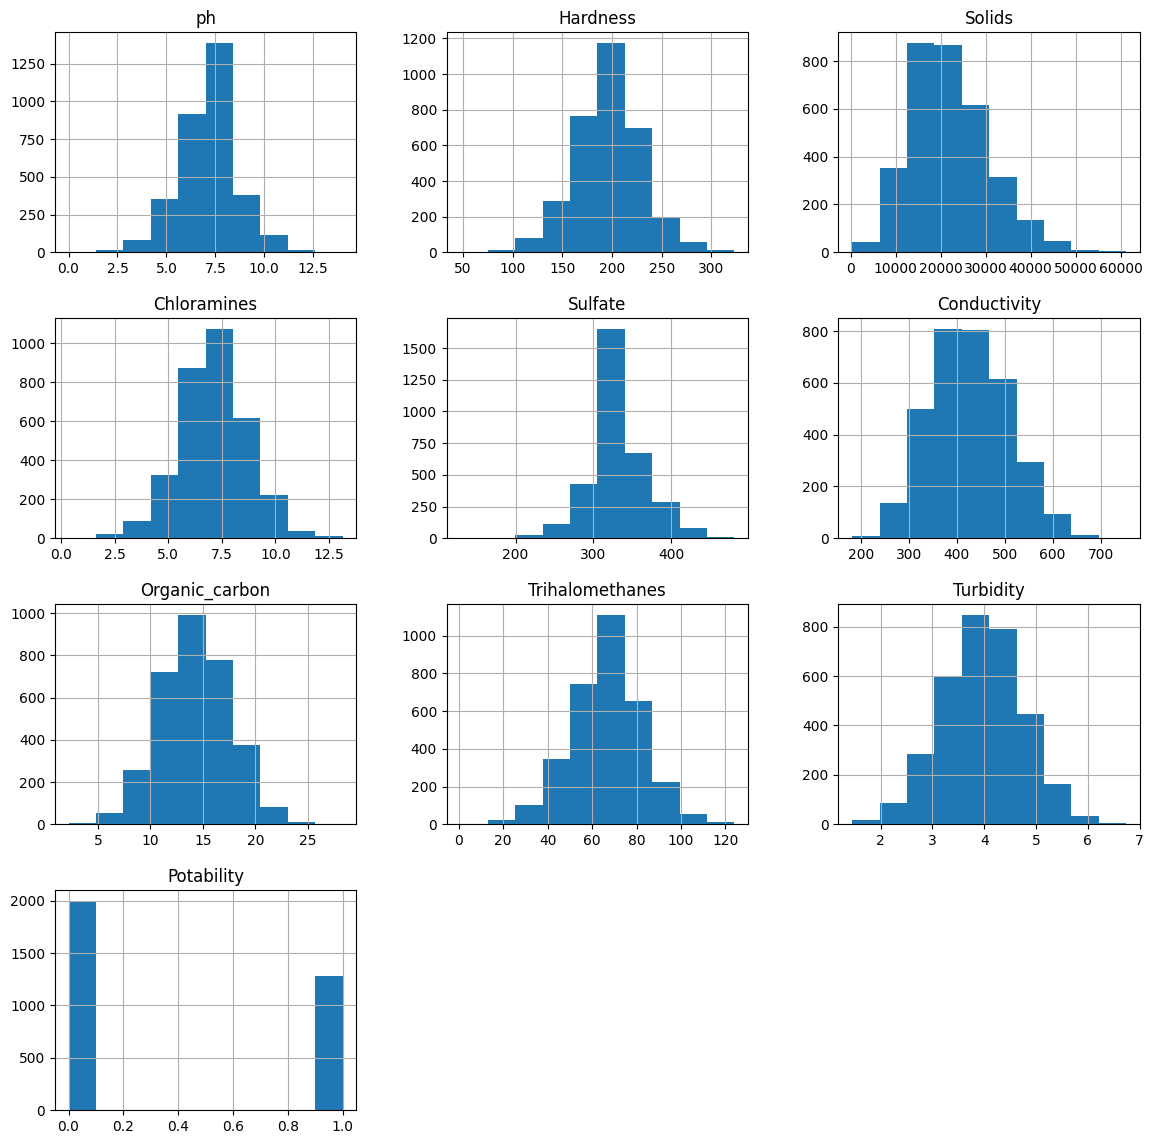

In [13]:
df.hist(figsize=(14,14))
plt.show()

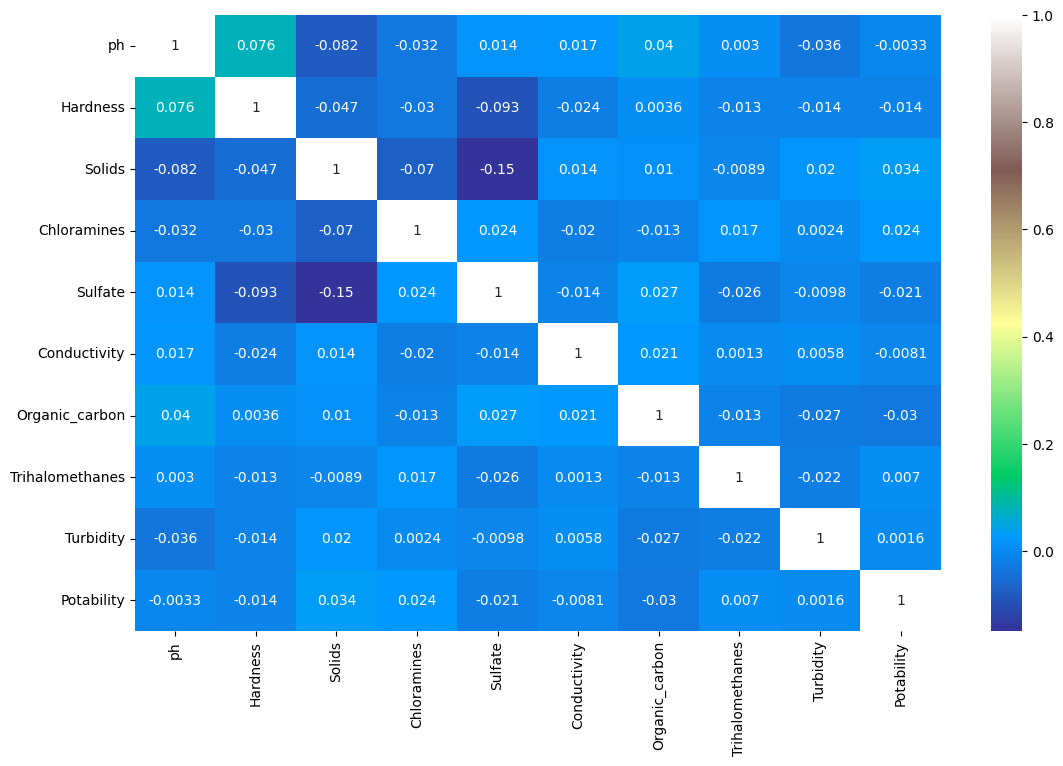

In [14]:
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(),annot=True,cmap='terrain')
plt.show()

<Axes: >

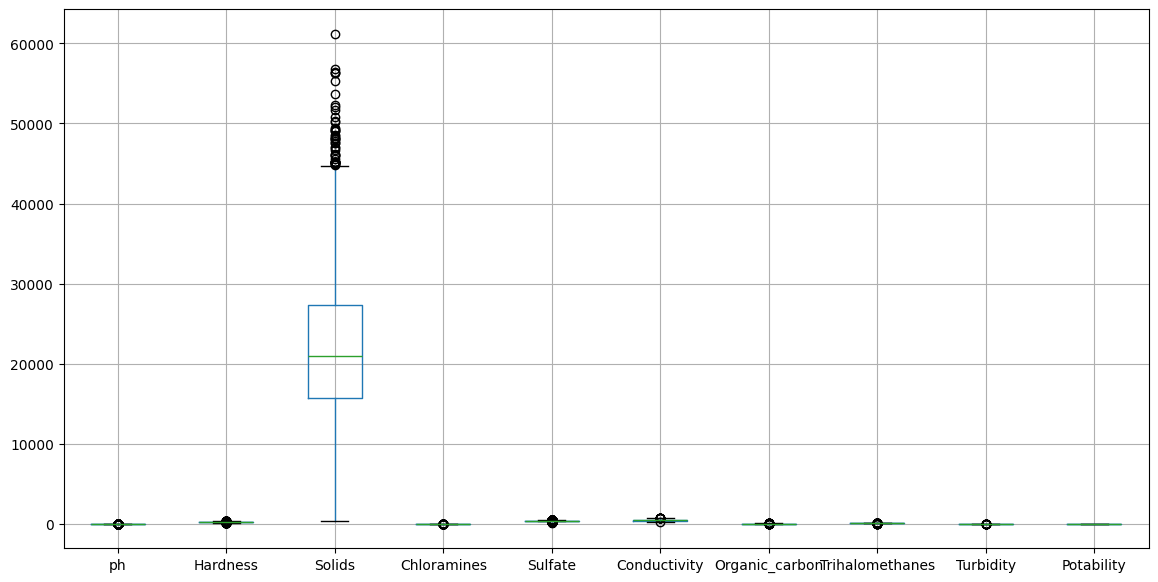

In [15]:
df.boxplot(figsize=(14,7))

In [16]:
X = df.drop('Potability',axis=1)
Y= df['Potability']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state=101,shuffle=True)

## Train Decision Tree Classifier and check accuracy

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dt=DecisionTreeClassifier(criterion= 'gini', min_samples_split= 10, splitter= 'best')
dt.fit(X_train,Y_train)

DecisionTreeClassifier(min_samples_split=10)

In [19]:
# Step : Extract feature importance
feature_importance = pd.Series(dt.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)
print("Top Parameters Influencing Water Quality:\n")
print(feature_importance)


Top Parameters Influencing Water Quality:

ph                 0.158073
Hardness           0.121069
Sulfate            0.117945
Chloramines        0.117441
Trihalomethanes    0.104528
Solids             0.104337
Conductivity       0.097675
Organic_carbon     0.097069
Turbidity          0.081864
dtype: float64


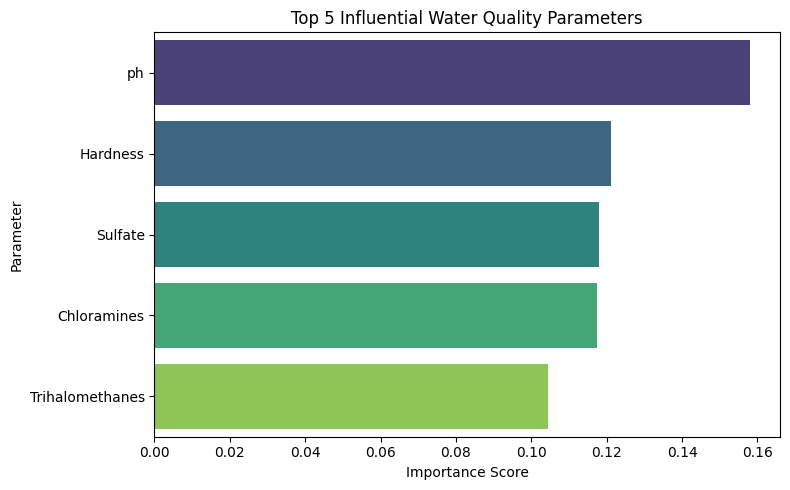

In [20]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x=feature_importance[:5].values,
    y=feature_importance.index[:5],
    hue=feature_importance.index[:5],  # Add hue explicitly
    palette="viridis",
    legend=False  # Optional: removes legend since hue is just for color
)
plt.title("Top 5 Influential Water Quality Parameters")
plt.xlabel("Importance Score")
plt.ylabel("Parameter")
plt.tight_layout()
plt.show()


In [21]:
print("Summary:")
print("This model uses Decision Tree Classification to predict water potability based on quality parameters.")
print("The most influential factors affecting water quality in this dataset are listed above.")
print("These insights can help in monitoring water bodies, detecting contamination early, and planning interventions.")


Summary:
This model uses Decision Tree Classification to predict water potability based on quality parameters.
The most influential factors affecting water quality in this dataset are listed above.
These insights can help in monitoring water bodies, detecting contamination early, and planning interventions.


In [22]:
prediction=dt.predict(X_test)
print(f"Accuracy Score = {accuracy_score(Y_test,prediction)*100}")
print(f"Confusion Matrix =\n {confusion_matrix(Y_test,prediction)}")
print(f"Classification Report =\n {classification_report(Y_test,prediction)}")


Accuracy Score = 59.60365853658537
Confusion Matrix =
 [[276 126]
 [139 115]]
Classification Report =
               precision    recall  f1-score   support

           0       0.67      0.69      0.68       402
           1       0.48      0.45      0.46       254

    accuracy                           0.60       656
   macro avg       0.57      0.57      0.57       656
weighted avg       0.59      0.60      0.59       656



In [23]:

input_data = pd.DataFrame([[5.735724, 158.318741, 25363.016594, 7.728601, 377.543291, 568.304671, 13.626624, 75.952337, 4.732954]], 
                          columns=X.columns)

res = dt.predict(input_data)[0]
print("Prediction:", "Potable" if res == 1 else "Not Potable")


Prediction: Potable


## Apply Hyper Parameter Tuning

In [24]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = DecisionTreeClassifier()
criterion = ["gini", "entropy"]
splitter = ["best", "random"]
min_samples_split = [2,4,6,8,10,12,14]

# define grid search
grid = dict(splitter=splitter, criterion=criterion, min_samples_split=min_samples_split)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_dt = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, 
                           scoring='accuracy',error_score=0)
grid_search_dt.fit(X_train, Y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [25]:
print(f"Best: {grid_search_dt.best_score_:.3f} using {grid_search_dt.best_params_}")
means = grid_search_dt.cv_results_['mean_test_score']
stds = grid_search_dt.cv_results_['std_test_score']
params = grid_search_dt.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")
    
print("Training Score:",grid_search_dt.score(X_train, Y_train)*100)
print("Testing Score:", grid_search_dt.score(X_test, Y_test)*100)

Best: 0.594 using {'criterion': 'gini', 'min_samples_split': 14, 'splitter': 'random'}
0.583 (0.030) with: {'criterion': 'gini', 'min_samples_split': 2, 'splitter': 'best'}
0.570 (0.032) with: {'criterion': 'gini', 'min_samples_split': 2, 'splitter': 'random'}
0.583 (0.033) with: {'criterion': 'gini', 'min_samples_split': 4, 'splitter': 'best'}
0.575 (0.036) with: {'criterion': 'gini', 'min_samples_split': 4, 'splitter': 'random'}
0.585 (0.030) with: {'criterion': 'gini', 'min_samples_split': 6, 'splitter': 'best'}
0.575 (0.026) with: {'criterion': 'gini', 'min_samples_split': 6, 'splitter': 'random'}
0.586 (0.033) with: {'criterion': 'gini', 'min_samples_split': 8, 'splitter': 'best'}
0.581 (0.025) with: {'criterion': 'gini', 'min_samples_split': 8, 'splitter': 'random'}
0.591 (0.028) with: {'criterion': 'gini', 'min_samples_split': 10, 'splitter': 'best'}
0.588 (0.030) with: {'criterion': 'gini', 'min_samples_split': 10, 'splitter': 'random'}
0.591 (0.027) with: {'criterion': 'gini',

## Random Forest Classifier



In [26]:
from sklearn.ensemble import RandomForestClassifier


In [27]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=101)

# Fit the model
rf.fit(X_train, Y_train)

# Make predictions
rf_preds = rf.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy Score:", accuracy_score(Y_test, rf_preds) * 100)
print("Confusion Matrix:\n", confusion_matrix(Y_test, rf_preds))
print("Classification Report:\n", classification_report(Y_test, rf_preds))


Accuracy Score: 69.0548780487805
Confusion Matrix:
 [[356  46]
 [157  97]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.89      0.78       402
           1       0.68      0.38      0.49       254

    accuracy                           0.69       656
   macro avg       0.69      0.63      0.63       656
weighted avg       0.69      0.69      0.67       656



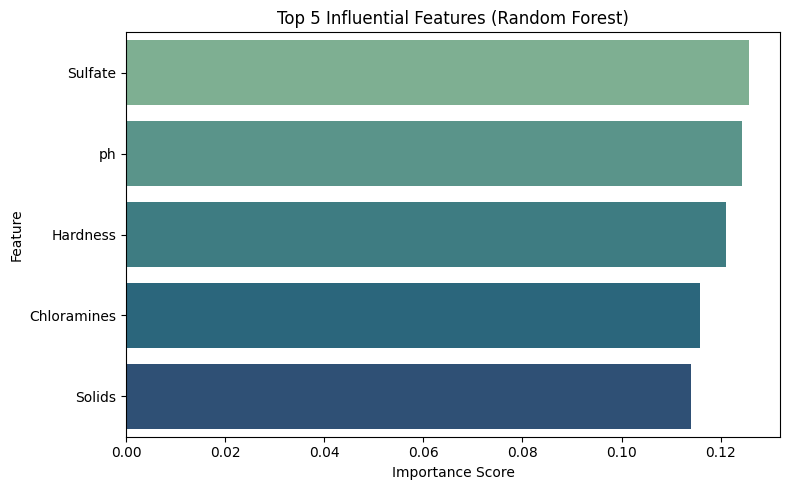

In [28]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("water_potability.csv")

# Handle missing values (you can use other strategies too)
df.fillna(df.mean(), inplace=True)

# Split features and target
X = df.drop("Potability", axis=1)
y = df["Potability"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Get feature importances
rf_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot top 5 features
plt.figure(figsize=(8, 5))
sns.barplot(
    x=rf_importance[:5].values,
    y=rf_importance.index[:5],
    hue=rf_importance.index[:5],  # For color variation
    palette="crest",
    legend=False
)
plt.title("Top 5 Influential Features (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


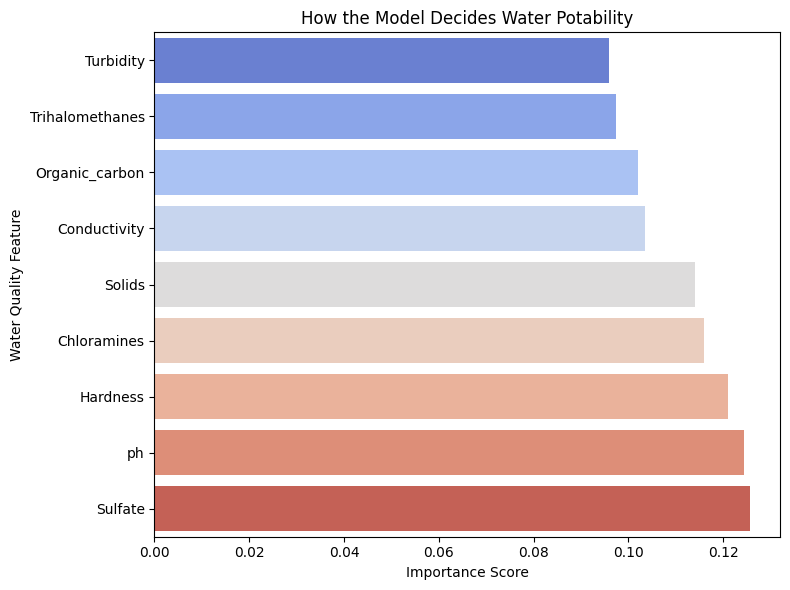

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from trained model
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, hue=feature_importance.index, palette='coolwarm', legend=False)
plt.title("How the Model Decides Water Potability")
plt.xlabel("Importance Score")
plt.ylabel("Water Quality Feature")
plt.tight_layout()
plt.show()


In [30]:
print("Random Forest Summary:")
print("This model uses Random Forest Classification to predict water potability based on water quality parameters.")
print("The bar chart above shows the top 5 features that influence the prediction the most.")
print("These results assist in identifying key risk factors and planning early interventions to improve water safety and management.")


Random Forest Summary:
This model uses Random Forest Classification to predict water potability based on water quality parameters.
The bar chart above shows the top 5 features that influence the prediction the most.
These results assist in identifying key risk factors and planning early interventions to improve water safety and management.


## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the model with more iterations and class balancing
lr = LogisticRegression(max_iter=1000, class_weight='balanced')

# Train the model
lr.fit(X_train_scaled, Y_train)

# Predict on test set
pred_lr = lr.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Results:\n")
print(f"Accuracy Score = {accuracy_score(Y_test, pred_lr) * 100:.2f}%")
print("Confusion Matrix:\n", confusion_matrix(Y_test, pred_lr))
print("Classification Report:\n", classification_report(Y_test, pred_lr))


Logistic Regression Results:

Accuracy Score = 50.91%
Confusion Matrix:
 [[201 201]
 [121 133]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.50      0.56       402
           1       0.40      0.52      0.45       254

    accuracy                           0.51       656
   macro avg       0.51      0.51      0.50       656
weighted avg       0.54      0.51      0.52       656



## K-Nearest Neighbors (KNN) 

In [32]:
# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, Y_train)

# Predict on test data
pred_knn = knn.predict(X_test)

# Evaluate the model
print("K-Nearest Neighbors (KNN) Results:\n")
print(f"Accuracy Score = {accuracy_score(Y_test, pred_knn) * 100:.2f}%")
print("Confusion Matrix:\n", confusion_matrix(Y_test, pred_knn))
print("Classification Report:\n", classification_report(Y_test, pred_knn))


K-Nearest Neighbors (KNN) Results:

Accuracy Score = 56.25%
Confusion Matrix:
 [[284 118]
 [169  85]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.71      0.66       402
           1       0.42      0.33      0.37       254

    accuracy                           0.56       656
   macro avg       0.52      0.52      0.52       656
weighted avg       0.55      0.56      0.55       656



## Support Vector Machine (SVM)

In [33]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train the SVM model with class balancing
svm_model = SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced')
svm_model.fit(X_train_scaled, Y_train)

# Step 3: Predictions
svm_preds = svm_model.predict(X_test_scaled)

# Step 4: Evaluation
svm_accuracy = accuracy_score(Y_test, svm_preds)
print(f"SVM Accuracy: {svm_accuracy * 100}")
print("SVM Confusion Matrix:\n", confusion_matrix(Y_test, svm_preds))
print("SVM Classification Report:\n", classification_report(Y_test, svm_preds))


SVM Accuracy: 51.0670731707317
SVM Confusion Matrix:
 [[207 195]
 [126 128]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.51      0.56       402
           1       0.40      0.50      0.44       254

    accuracy                           0.51       656
   macro avg       0.51      0.51      0.50       656
weighted avg       0.53      0.51      0.52       656



In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# STEP 1: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 2: Define SVM hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.01, 0.001],
    'kernel': ['rbf', 'linear'],
    'class_weight': ['balanced']
}

# STEP 3: Setup and run GridSearchCV
svm = SVC(probability=True)  # probability=True only if you plan to use predict_proba
grid_search_svm = GridSearchCV(
    svm,
    param_grid,
    cv=5,
    scoring='f1_macro',    # makes the model care about both classes
    verbose=1,
    n_jobs=-1
)

# Fit the model
grid_search_svm.fit(X_train_scaled, Y_train)

# STEP 4: Use best model to predict
best_svm = grid_search_svm.best_estimator_
svm_preds_best = best_svm.predict(X_test_scaled)

# STEP 5: Evaluate results
print(f"Best SVM Parameters: {grid_search_svm.best_params_}")
print(f"Best SVM Accuracy: {accuracy_score(Y_test, svm_preds_best) * 100:.2f}%")
print("Confusion Matrix:\n", confusion_matrix(Y_test, svm_preds_best))
print("Classification Report:\n", classification_report(Y_test, svm_preds_best))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best SVM Parameters: {'C': 1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
Best SVM Accuracy: 50.91%
Confusion Matrix:
 [[206 196]
 [126 128]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.51      0.56       402
           1       0.40      0.50      0.44       254

    accuracy                           0.51       656
   macro avg       0.51      0.51      0.50       656
weighted avg       0.53      0.51      0.52       656

